<a href="https://colab.research.google.com/github/String-ru/AIFFEL_quest_cr/blob/main/tensorflow_250124_3_5_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [22]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[-0.16478305]
 [ 0.30743158]
 [-0.57646835]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[0.06059015]
 [0.5069393 ]
 [0.5262197 ]], shape=(3, 1), dtype=float32)


In [24]:
import numpy as np

x = np.ones(shape=(2, 2))

In [25]:
x = tf.ones(shape=(2, 2))
x[0, 0] = 0.

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [26]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.753433  ],
       [-1.7847241 ],
       [ 0.22560336]], dtype=float32)>


In [27]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [28]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [29]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [30]:
v.assign_sub(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [38]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d
f = e

print('a= ', a.numpy(), '\n')
print('b= ', b.numpy(), '\n')
print('c= ', c.numpy(), '\n')
print('d= ', d.numpy(), '\n')
print('e= ', e.numpy(), '\n')
print('f= ', f.numpy())

a=  [[1. 1.]
 [1. 1.]] 

b=  [[1. 1.]
 [1. 1.]] 

c=  [[1. 1.]
 [1. 1.]] 

d=  [[2. 2.]
 [2. 2.]] 

e=  [[4. 4.]
 [4. 4.]] 

f=  [[4. 4.]
 [4. 4.]]


In [39]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
  result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

In [40]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
  tape.watch(input_const)
  result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

In [43]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position = 4.9 * time ** 2
  speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

print(acceleration.numpy())

9.8


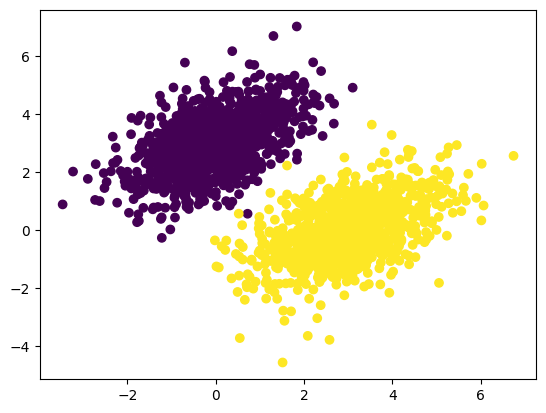

In [47]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean = [0, 3],
    cov = [[1, 0.5], [0.5, 1]],
    size = num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean = [3, 0],
    cov = [[1, 0.5], [0.5, 1]],
    size = num_samples_per_class)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

import matplotlib.pyplot as plt

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [48]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

def model(inputs):
  return tf.matmul(inputs, W) + b

def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(predictions, targets)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss

In [49]:
for step in range(40):
  loss = training_step(inputs, targets)
  print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 2.7727
Loss at step 1: 0.3364
Loss at step 2: 0.1466
Loss at step 3: 0.1130
Loss at step 4: 0.1020
Loss at step 5: 0.0947
Loss at step 6: 0.0885
Loss at step 7: 0.0829
Loss at step 8: 0.0778
Loss at step 9: 0.0732
Loss at step 10: 0.0690
Loss at step 11: 0.0651
Loss at step 12: 0.0616
Loss at step 13: 0.0584
Loss at step 14: 0.0555
Loss at step 15: 0.0528
Loss at step 16: 0.0504
Loss at step 17: 0.0482
Loss at step 18: 0.0462
Loss at step 19: 0.0444
Loss at step 20: 0.0427
Loss at step 21: 0.0412
Loss at step 22: 0.0398
Loss at step 23: 0.0386
Loss at step 24: 0.0374
Loss at step 25: 0.0364
Loss at step 26: 0.0354
Loss at step 27: 0.0346
Loss at step 28: 0.0338
Loss at step 29: 0.0331
Loss at step 30: 0.0324
Loss at step 31: 0.0318
Loss at step 32: 0.0313
Loss at step 33: 0.0308
Loss at step 34: 0.0303
Loss at step 35: 0.0299
Loss at step 36: 0.0296
Loss at step 37: 0.0292
Loss at step 38: 0.0289
Loss at step 39: 0.0286


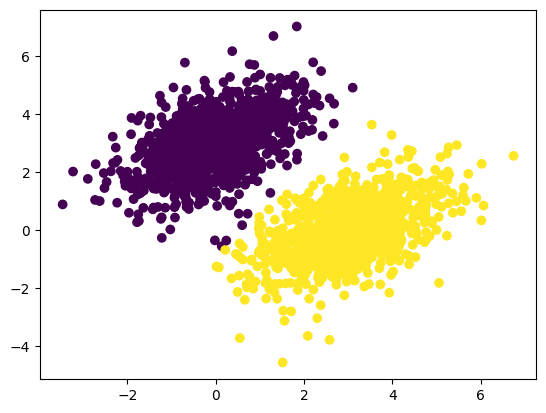

In [50]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

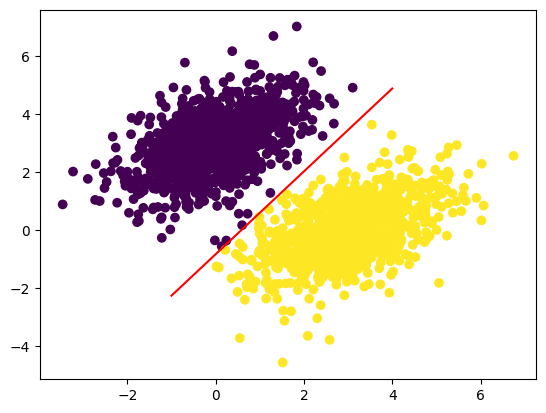

In [51]:
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()